In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use("seaborn-darkgrid")

%matplotlib inline


In [2]:
# Create original grid

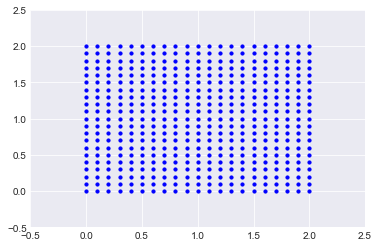

In [3]:
# Set original grid
y, x = np.mgrid[0:2.1:0.1, 0:2.1:0.1] # from -2 to 3 (exclusive) steps of 1 
# Convert to vector:
X = np.array([np.ravel(x), np.ravel(y)])
n_points = X.shape[1] #(2,441)
# convert to homogenous coord:
X = np.vstack([X, np.ones((1,n_points))]) #shape=(3,441) last column is all ones

plt.scatter(X[0],X[1], s=10 ,c='b')
plt.xlim(-.5,2.5)
plt.ylim(-.5,2.5)
plt.show()


# Translation

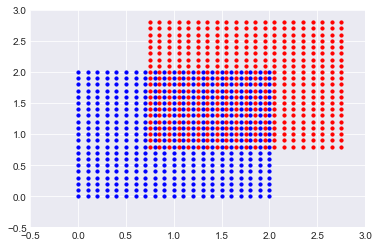

In [4]:
# create transformation matrix
tx = .75
ty = .8
A = np.array([[1,0,tx],
             [0,1,ty]])

X_translate = np.matmul(A,X)


plt.scatter(X[0],X[1], s=10 ,c='b')
plt.scatter(X_translate[0],X_translate[1], s=10 ,c='r')
plt.xlim(-.5,3)
plt.ylim(-.5,3)
plt.show()


# Rotation

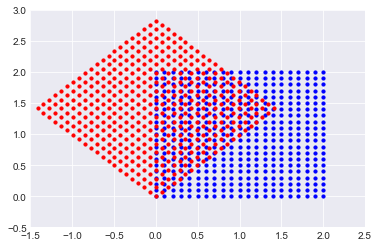

In [5]:
# create transformation matrix
theta = np.pi/4. # Angle, in radians
A = np.array([[np.cos(theta),-np.sin(theta),0],
             [np.sin(theta),np.cos(theta),0]])

X_rotate = np.matmul(A,X)


plt.scatter(X[0],X[1], s=10 ,c='b')
plt.scatter(X_rotate[0],X_rotate[1], s=10 ,c='r')
plt.xlim(-1.5,2.5)
plt.ylim(-.5,3)
plt.show()


# Rigid / Euclidean

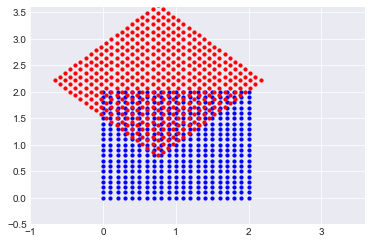

In [6]:
# create transformation matrix
A = np.array([[np.cos(theta),-np.sin(theta),tx],
             [np.sin(theta),np.cos(theta),ty]])

X_rotate = np.matmul(A,X)


plt.scatter(X[0],X[1], s=10 ,c='b')
plt.scatter(X_rotate[0],X_rotate[1], s=10 ,c='r')
plt.xlim(-1,3.6)
plt.ylim(-.5,3.6)
plt.show()


# Affine

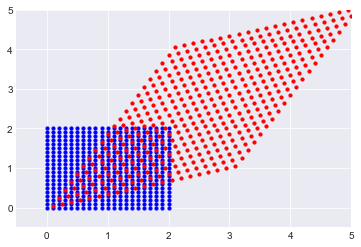

In [7]:
# create transformation matrix
A = np.array([[1,1.5,.1],
             [2,0.5,.05]])

X_Affine = np.matmul(A,X)


plt.scatter(X[0],X[1], s=10 ,c='b')
plt.scatter(X_Affine [0],X_Affine [1], s=10 ,c='r')
plt.xlim(-.5,5)
plt.ylim(-.5,5)
plt.show()


# Projection

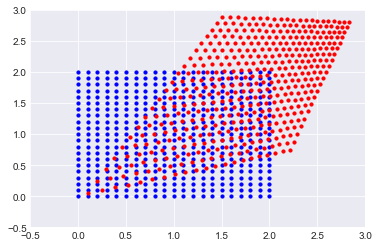

In [8]:
# create transformation matrix
theta = np.pi/4. # Angle, in radians
# create transformation matrix
A = np.array([[1,1.5,.1],
             [2,0.5,.05],
             [.2,.2,1]])

X_proj = np.matmul(A,X)


plt.scatter(X[0],X[1], s=10 ,c='b')
plt.scatter(X_proj[0] / X_proj[2], X_proj[1] / X_proj[2], s=10 ,c='r')
plt.xlim(-.5,3)
plt.ylim(-.5,3)
plt.show()

# Bilinear interpolation example

In [10]:
# Shape is 2,2. Domain (0,1)
I = np.array([[10,0],[0,0]])
I_vec = np.ravel(I)
H = 2 # working with python, we need H = H'+1 
W = 2
# closest to I(0,0)=10
x = 0.25
y = 0.25

weights = np.squeeze(np.zeros((4,1)))

i = 0
for m in range(2):
    for n in range(2):
        weights[i] = np.maximum(0, 1-np.abs(x-m))*np.maximum(0,1-np.abs(y-n))
        i+=1

print("Vi =", end=" ")
for i in range(4):
    if i < 3:
        print(I_vec[i], "*" , weights[i], end=" + ")
    if i == 3:
        print(I_vec[i], "*" , weights[i])


print("Vi =", np.dot(I_vec, weights))
print("weights sum =", np.sum(weights))

Vi = 10 * 0.5625 + 0 * 0.1875 + 0 * 0.1875 + 0 * 0.0625
Vi = 5.625
weights sum = 1.0
